In [1]:
# This generate a png and a csv file for each map and pattern to determine the best solutions and plot the pareto front but only for the 50th row/generation of the optLog.csv file

import os
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

def non_dominated_solutions(objective_values):
    """Find non-dominated solutions from a list of objective values."""
    if not objective_values:
        return []
    
    objective_values = np.array(objective_values)
    is_dominated = np.zeros(len(objective_values), dtype=bool)
    
    for i in range(len(objective_values)):
        for j in range(len(objective_values)):
            if i != j:
                if np.all(objective_values[j] <= objective_values[i]) and np.any(objective_values[j] < objective_values[i]):
                    is_dominated[i] = True
                    break
    
    return [list(objective_values[i]) for i in range(len(objective_values)) if not is_dominated[i]]

def process_csv(file_path):
    """Reads the last row of a CSV file and processes the 'objectiveValues' column."""
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Ensure 'objectiveValues' column is correctly processed
        if ' objectiveValues' in df.columns:
            if not df.empty:
                # Process only the last row (50th row)
                last_row = df.iloc[50]
                objective_values_str = last_row[' objectiveValues']
                try:
                    # Convert string to list of lists of floats
                    objective_values_list = ast.literal_eval(objective_values_str)
                    return objective_values_list
                except (ValueError, SyntaxError) as e:
                    print(f"Error processing last row in file {file_path}: {e}")
            else:
                print(f"File {file_path} is empty.")
        else:
            print(f"'objectiveValues' column not found in {file_path}")
        
        return []
    
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return []

def plot_pareto_front(map_name, pattern, objective_values):
    """Plot and save Pareto front for given map and pattern."""
    non_dominated = non_dominated_solutions(objective_values)
    
    # Convert to numpy array for plotting
    non_dominated_np = np.array(non_dominated)
    objective_values_np = np.array(objective_values)
    
    # Plot all solutions
    plt.figure(figsize=(8, 8))
    plt.scatter(objective_values_np[:, 0], objective_values_np[:, 1], color='blue', label='All Solutions')
    
    # Plot non-dominated solutions
    if len(non_dominated_np) > 0:
        plt.scatter(non_dominated_np[:, 0], non_dominated_np[:, 1], color='red', label='Non-Dominated Solutions', edgecolor='black')
    
    plt.xlabel('Steps')
    plt.ylabel('Shifted Weight')
    #plt.title(f'Pareto Front for {map_name} - {pattern}')
    plt.legend()
    plt.grid(True)
    
    # Save plot
    plot_file_path = f'{map_name}_{pattern}_pareto_front.png'
    plt.savefig(plot_file_path)
    plt.close()

    # Save objective values to CSV
    csv_file_path = f'{map_name}_{pattern}_objective_values.csv'
    df = pd.DataFrame(objective_values, columns=['Steps', 'Shifted Weight'])
    df.to_csv(csv_file_path, index=False)

def traverse_and_process(base_folder):
    """Traverses the folder structure and processes all optLog.csv files."""
    #patterns = [f'_{i}_' for i in range(5)]  # Patterns like '_0_', '_1_', etc.
    patterns = ['_5_']
    for map_name in ['gradientMap', 'meanderingRiverMap', 'radialGradientMap', 'sinusoidalMap']:
        print(f"Processing map: {map_name}")
        map_folder = os.path.join(base_folder, map_name)
        
        if os.path.exists(map_folder):
            pattern_objective_values = {pattern: [] for pattern in patterns}
            
            for root, dirs, files in os.walk(map_folder):
                for dir_name in dirs:
                    for pattern in patterns:
                        if pattern in dir_name:
                            subfolder_name = dir_name
                            subfolder_path = os.path.join(root, dir_name)
                            print(f"  Processing subfolder: {subfolder_name}")
                            
                            for file in os.listdir(subfolder_path):
                                if file == 'optLog.csv':
                                    file_path = os.path.join(subfolder_path, file)
                                    print(f"    Processing file: {file_path}")
                                    last_row_objective_values = process_csv(file_path)
                                    if last_row_objective_values:
                                        pattern_objective_values[pattern].extend(last_row_objective_values)
            
            # Plot Pareto fronts for each pattern
            for pattern, objective_values in pattern_objective_values.items():
                if objective_values:
                    plot_pareto_front(map_name, pattern.strip('_'), objective_values)

# Define the base folder path
base_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final'

# Start processing
traverse_and_process(base_folder)


Processing map: gradientMap
  Processing subfolder: gradientObstacles_CTAEA_5_4978
    Processing file: /Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/gradientMap/gradientObstacles_CTAEA_5_4978/optLog.csv
  Processing subfolder: gradientObstacles_MOEAD_5_799403
    Processing file: /Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/gradientMap/gradientObstacles_MOEAD_5_799403/optLog.csv
  Processing subfolder: gradientObstacles_CTAEA_5_890651
    Processing file: /Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/gradientMap/gradientObstacles_CTAEA_5_890651/optLog.csv
  Processing subfolder: gradientObstacles_DNSGA2_5_167867
    Processing file: /Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/gradientMap/gradientObstacles_DNSGA2_5_167867/optLog.csv
  Processing subfolder: gradientObstacles_SPEA2_5_397562
    Processing file: /Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/gradientMap/gradientObstacles_SPEA2_5_397562/optLog.csv

gradientMap
[[57.0, 50.0525], [71.0, 164.47], [93.0, 35.16], [77.0, 196.17], [112.0, 103.6], [91.0, 179.32], [59.0, 34.62], [98.0, 112.99], [107.0, 123.32], [59.0, 32.25], [55.0, 361.33], [85.0, 121.85], [63.0, 45.61], [125.0, 143.53], [127.0, 104.13], [71.0, 161.73], [57.0, 49.15632813], [89.0, 158.66], [89.0, 277.89], [189.0, 108.52], [101.0, 138.95], [65.0, 34.56], [101.0, 43.42], [83.0, 148.05], [75.0, 248.46], [59.0, 49.21879395], [57.0, 48.0044604], [55.0, 36.58], [55.0, 36.08], [85.0, 120.38], [85.0, 120.63], [63.0, 32.04], [139.0, 28.21], [96.0, 122.73], [55.0, 34.71], [61.0, 500.78], [61.0, 507.81], [71.0, 162.53], [93.0, 152.7], [75.0, 27.01], [97.0, 102.69], [121.0, 118.5], [77.0, 210.72], [55.0, 499.62], [65.0, 49.37960953], [69.0, 175.66], [55.0, 35.36], [55.0, 35.11], [65.0, 211.45], [85.0, 135.4], [69.0, 225.33], [91.0, 133.52], [67.0, 202.61], [89.0, 142.0], [63.0, 188.87], [71.0, 161.06], [75.0, 182.38], [55.0, 503.41], [92.0, 142.2], [59.0, 39.08291667], [69.0, 48.585

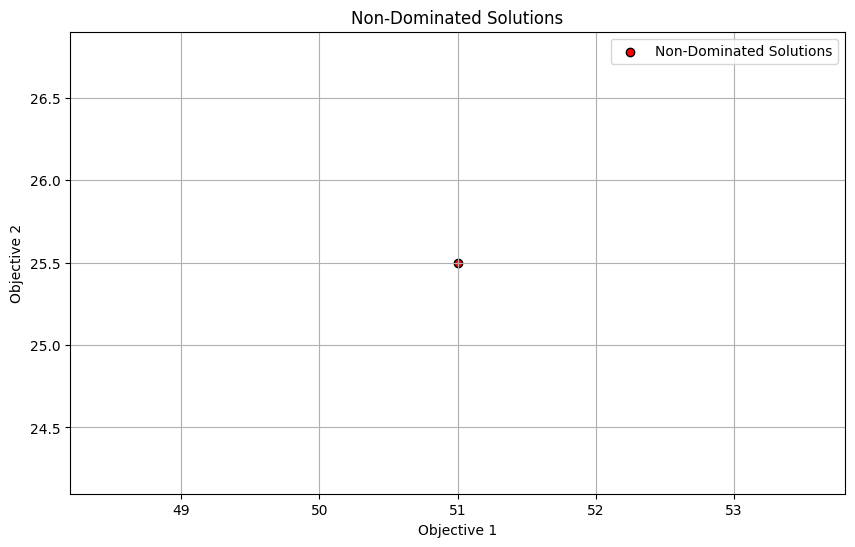

Non-Dominated Solutions: [[51.0, 25.5]]

meanderingRiverMap
[[57.0, 80.59355486], [85.0, 56.15889385], [59.0, 137.94543071], [78.0, 71.92550284], [125.0, 82.01978013], [89.0, 99.34920531], [83.0, 92.76043174], [51.0, 57.67272184], [57.0, 134.40031748], [59.0, 136.71963148], [93.0, 95.72435209], [70.0, 101.67274481], [77.0, 69.64984812], [101.0, 87.65818392], [85.0, 68.40992606], [69.0, 99.9474421], [55.0, 80.28584938], [112.0, 84.24443307], [71.0, 118.49230634], [112.0, 84.30625633], [79.0, 103.61842105], [91.0, 96.14729932], [61.0, 120.99717974], [59.0, 61.8767767], [61.0, 144.3944443], [95.0, 83.17249541], [59.0, 66.60830672], [61.0, 54.38846974], [59.0, 64.42297351], [83.0, 74.578894], [112.0, 64.25369432], [118.0, 86.96856904], [96.0, 77.23753623], [125.0, 60.89531959], [55.0, 123.33069248], [55.0, 62.87480704], [63.0, 82.88634689], [99.0, 49.23886578], [55.0, 57.33894839], [61.0, 81.5058342], [71.0, 82.21907799], [57.0, 62.49588129], [61.0, 120.43841366], [57.0, 78.17343598], [77.

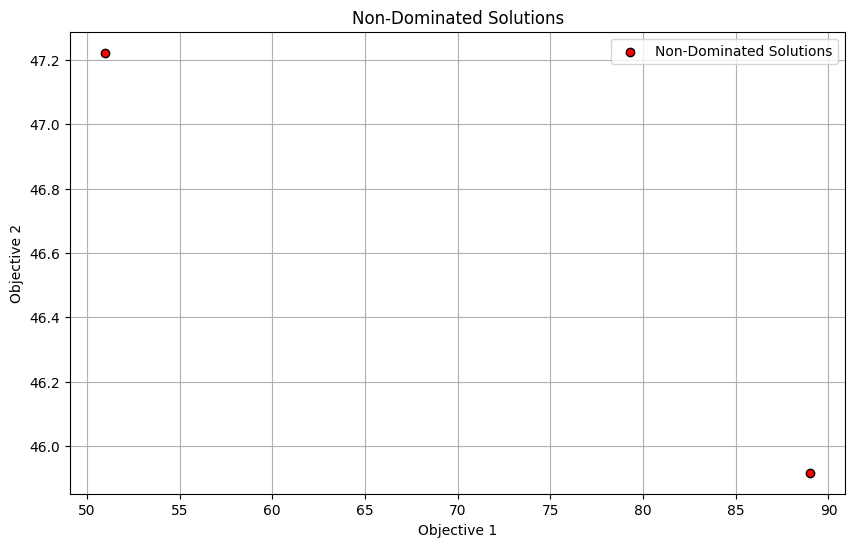

Non-Dominated Solutions: [[89.0, 45.91658007], [51.0, 47.22289615]]

radialGradientMap
[[77.0, 71.84780622], [95.0, 29.84887487], [65.0, 89.56630828], [75.0, 49.91466754], [83.0, 48.99965966], [77.0, 70.94643802], [55.0, 229.94332648], [69.0, 87.86978725], [61.0, 97.14227069], [69.0, 125.03246192], [115.0, 56.80166501], [71.0, 67.93241728], [101.0, 47.12690822], [61.0, 147.30772979], [69.0, 80.63861742], [63.0, 42.05747374], [85.0, 58.67308687], [81.0, 48.45983554], [59.0, 50.23990455], [61.0, 114.39059311], [109.0, 29.48528329], [85.0, 43.22947568], [63.0, 122.17374976], [99.0, 41.81712654], [61.0, 64.72105416], [110.0, 34.09208868], [57.0, 65.25395001], [59.0, 179.26647649], [74.0, 74.49075925], [114.0, 31.54496812], [61.0, 51.13234152], [95.0, 37.93587751], [59.0, 63.97101597], [55.0, 64.77931496], [71.0, 81.61233981], [59.0, 50.07751707], [65.0, 51.07429042], [108.0, 46.59732917], [123.0, 40.1180211], [81.0, 63.20893718], [65.0, 41.94660585], [95.0, 51.02002642], [57.0, 47.94739632

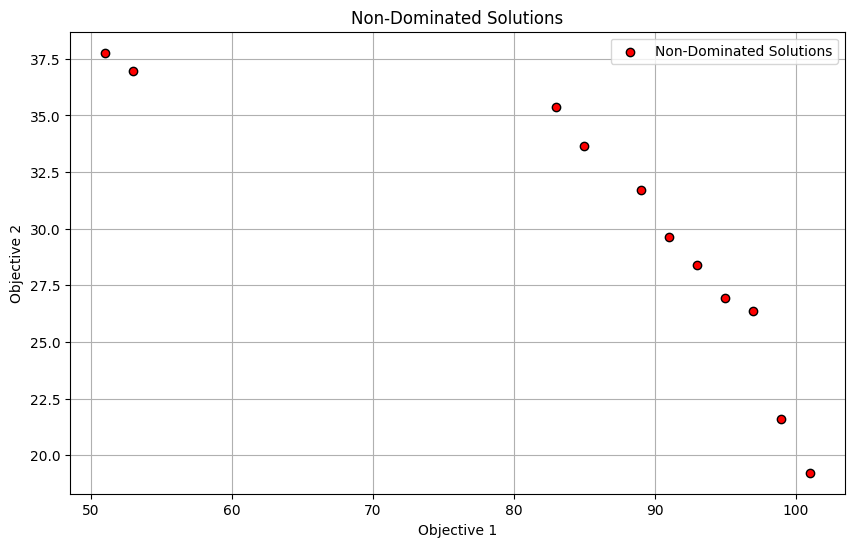

Non-Dominated Solutions: [[53.0, 36.98138293], [91.0, 29.64393172], [83.0, 35.35756881], [85.0, 33.63721196], [89.0, 31.70008072], [97.0, 26.35728008], [99.0, 21.57697112], [51.0, 37.7685628], [95.0, 26.91591313], [101.0, 19.22259548], [93.0, 28.39080023]]

sinusoidalMap
[[69.0, 36.29389263], [59.0, 65.54485283], [65.0, 59.32227833], [57.0, 41.45610737], [55.0, 41.66348742], [89.0, 51.38397892], [59.0, 55.03058456], [55.0, 47.97064303], [55.0, 60.59219321], [89.0, 33.35906917], [61.0, 41.2218192], [72.0, 38.93750705], [59.0, 36.40908042], [63.0, 63.16542497], [55.0, 86.41259288], [53.0, 38.83249923], [67.0, 35.01045607], [59.0, 48.02657907], [59.0, 59.26794912], [57.0, 52.69994147], [65.0, 34.82114973], [57.0, 50.43523422], [57.0, 40.58710876], [71.0, 41.07230653], [63.0, 51.32362013], [53.0, 39.03601023], [65.0, 47.89932576], [107.0, 36.50459875], [51.0, 35.70581924], [65.0, 44.01099141], [65.0, 49.17555198], [59.0, 29.86863555], [63.0, 45.56617159], [53.0, 48.35814111], [59.0, 50.399

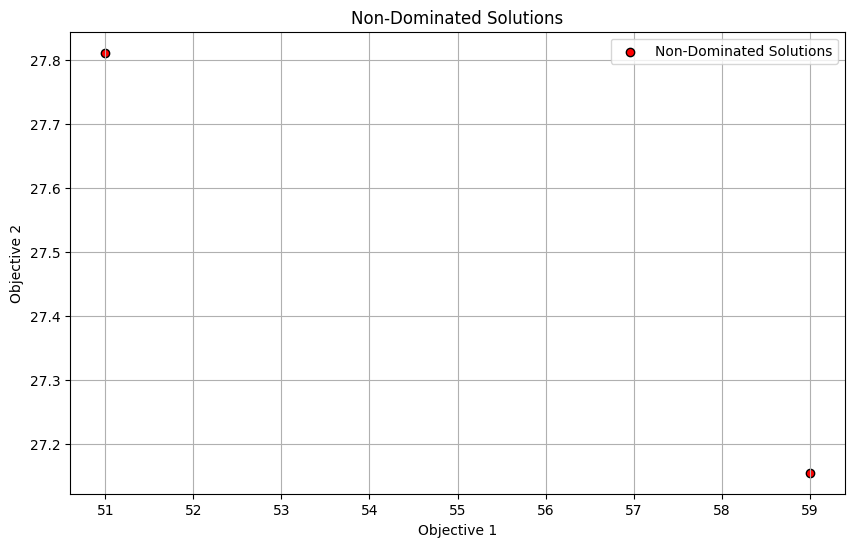

Non-Dominated Solutions: [[51.0, 27.81094625], [59.0, 27.1545367]]



In [26]:
import matplotlib.pyplot as plt

# Define the function to find non-dominated solutions
def find_non_dominated(solutions):
    non_dominated = []
    for i, s1 in enumerate(solutions):
        is_dominated = False
        for j, s2 in enumerate(solutions):
            if i != j:
                if all(x <= y for x, y in zip(s2, s1)) and any(x < y for x, y in zip(s2, s1)):
                    is_dominated = True
                    break
        if not is_dominated:
            non_dominated.append(s1)
    return non_dominated

for map_name, solutions in non_dominated_solutions_by_map.items():
    print(map_name)
    print(solutions)
    # Find non-dominated solutions
    non_dominated_solutions = find_non_dominated(solutions)
    # Plot the solutions
    plt.figure(figsize=(10, 6))

    # Convert to numpy array for easier handling
    import numpy as np
    solutions_np = np.array(solutions)
    non_dominated_np = np.array(non_dominated_solutions)

    # Plot all solutions
    #plt.scatter(solutions_np[:, 0], solutions_np[:, 1], color='blue', label='All Solutions')

    # Plot non-dominated solutions
    plt.scatter(non_dominated_np[:, 0], non_dominated_np[:, 1], color='red', label='Non-Dominated Solutions', edgecolor='black')

    plt.xlabel('Objective 1')
    plt.ylabel('Objective 2')
    plt.title('Non-Dominated Solutions')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Save non-dominated solutions to a separate list or file
    print("Non-Dominated Solutions:", non_dominated_solutions)
    print()

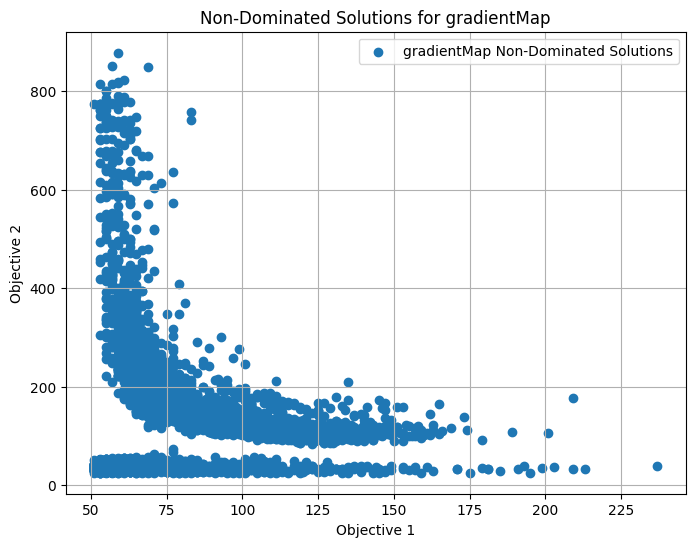

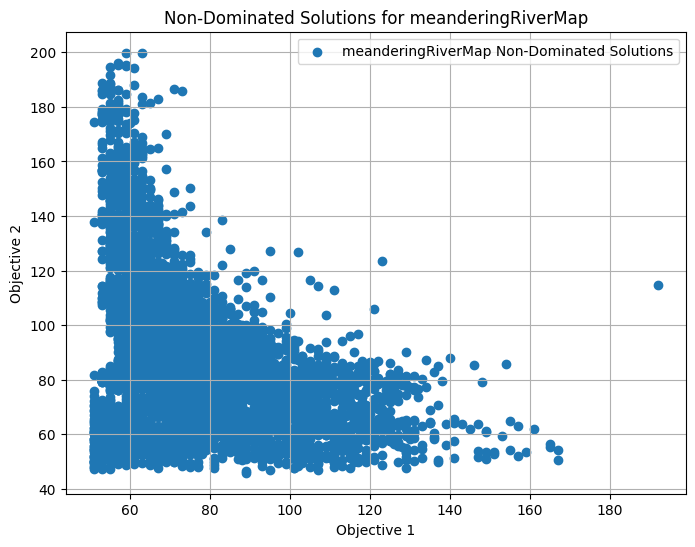

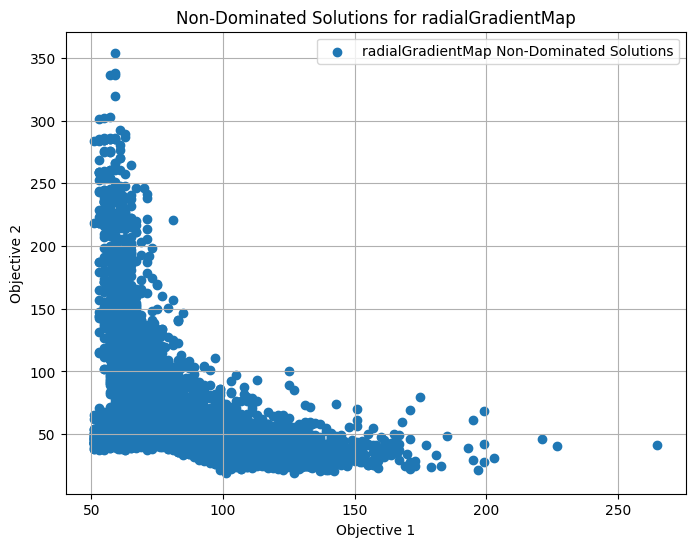

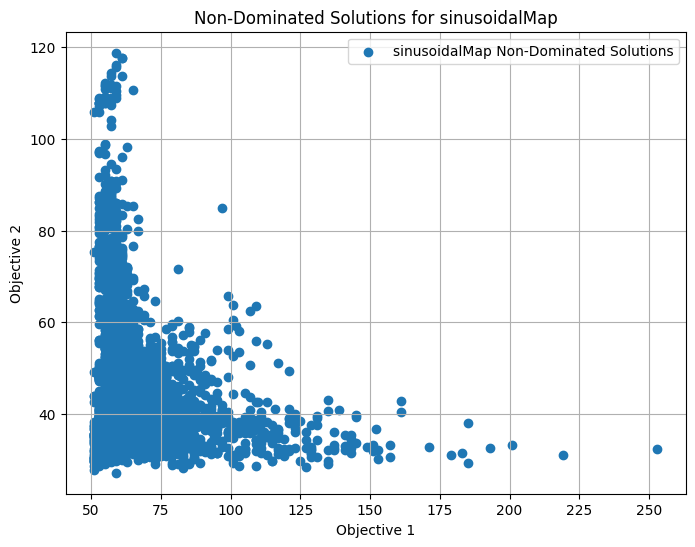

In [27]:
import matplotlib.pyplot as plt
for map_name, solutions in non_dominated_solutions_by_map.items():
        if solutions:
            solutions = np.array(solutions)
            plt.figure(figsize=(8, 6))
            plt.scatter(solutions[:, 0], solutions[:, 1], label=f'{map_name} Non-Dominated Solutions')
            plt.xlabel('Objective 1')
            plt.ylabel('Objective 2')
            plt.title(f'Non-Dominated Solutions for {map_name}')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print(f"No solutions to plot for {map_name}.")

In [2]:
import os
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

def non_dominated_solutions(objective_values):
    """Find non-dominated solutions from a list of objective values."""
    if not objective_values:
        return []
    
    objective_values = np.array(objective_values)
    is_dominated = np.zeros(len(objective_values), dtype=bool)
    
    for i in range(len(objective_values)):
        for j in range(len(objective_values)):
            if i != j:
                if np.all(objective_values[j] <= objective_values[i]) and np.any(objective_values[j] < objective_values[i]):
                    is_dominated[i] = True
                    break
    
    return [list(objective_values[i]) for i in range(len(objective_values)) if not is_dominated[i]]

def process_csv(file_path):
    """Reads the last 10 rows of a CSV file and processes the 'objectiveValues' column."""
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Ensure 'objectiveValues' column is correctly processed
        if ' objectiveValues' in df.columns:
            if not df.empty:
                # Process the last 10 rows
                last_rows = df.iloc[-10:]
                objective_values_list = []
                
                for _, row in last_rows.iterrows():
                    objective_values_str = row[' objectiveValues']
                    try:
                        # Convert string to list of lists of floats
                        objective_values = ast.literal_eval(objective_values_str)
                        objective_values_list.extend(objective_values)
                    except (ValueError, SyntaxError) as e:
                        print(f"Error processing row in file {file_path}: {e}")
                
                return objective_values_list
            else:
                print(f"File {file_path} is empty.")
        else:
            print(f"'objectiveValues' column not found in {file_path}")
        
        return []
    
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return []

def plot_pareto_front(map_name, pattern, objective_values):
    """Plot and save Pareto front for given map and pattern."""
    non_dominated = non_dominated_solutions(objective_values)
    
    # Convert to numpy array for plotting
    non_dominated_np = np.array(non_dominated)
    objective_values_np = np.array(objective_values)
    
    # Plot all solutions
    plt.figure(figsize=(8, 8))
    plt.scatter(objective_values_np[:, 0], objective_values_np[:, 1], color='blue', label='All Solutions')
    
    # Plot non-dominated solutions
    if len(non_dominated_np) > 0:
        plt.scatter(non_dominated_np[:, 0], non_dominated_np[:, 1], color='red', label='Non-Dominated Solutions', edgecolor='black')
    
    plt.xlabel('Steps')
    plt.ylabel('Shifted Weight')
    plt.legend()
    plt.grid(True)
    
    # Define the save directory and ensure it exists
    save_dir = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/data_analysis/GD_Calc_Data_Last_10_Rows'
    os.makedirs(save_dir, exist_ok=True)

    # Save plot
    plot_file_path = os.path.join(save_dir, f'{map_name}_{pattern}_pareto_front.png')
    plt.savefig(plot_file_path)
    plt.close()

    # Save objective values to CSV
    csv_file_path = os.path.join(save_dir, f'{map_name}_{pattern}_objective_values_new.csv')
    df = pd.DataFrame(objective_values, columns=['Steps', 'Shifted Weight'])
    df.to_csv(csv_file_path, index=False)

def traverse_and_process(base_folder):
    """Traverses the folder structure and processes all optLog.csv files."""
    patterns = ['_3_'] # '_1_', '_2_', , '_4_', '_5_'
    for map_name in ['gradientMap', 'meanderingRiverMap', 'radialGradientMap', 'sinusoidalMap']:
        print(f"Processing map: {map_name}")
        map_folder = os.path.join(base_folder, map_name)
        
        if os.path.exists(map_folder):
            pattern_objective_values = {pattern: [] for pattern in patterns}
            
            for root, dirs, files in os.walk(map_folder):
                for dir_name in dirs:
                    for pattern in patterns:
                        if pattern in dir_name:
                            subfolder_name = dir_name
                            subfolder_path = os.path.join(root, dir_name)
                            print(f"  Processing subfolder: {subfolder_name}")
                            
                            for file in os.listdir(subfolder_path):
                                if file == 'optLog.csv':
                                    file_path = os.path.join(subfolder_path, file)
                                    print(f"    Processing file: {file_path}")
                                    last_rows_objective_values = process_csv(file_path)
                                    if last_rows_objective_values:
                                        pattern_objective_values[pattern].extend(last_rows_objective_values)
            
            # Plot Pareto fronts for each pattern
            for pattern, objective_values in pattern_objective_values.items():
                if objective_values:
                    plot_pareto_front(map_name, pattern.strip('_'), objective_values)

# Define the base folder path
base_folder = '/Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final'

# Start processing
traverse_and_process(base_folder)


Processing map: gradientMap
  Processing subfolder: gradientObstacles_SMSEMOA_3_591868
    Processing file: /Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/gradientMap/gradientObstacles_SMSEMOA_3_591868/optLog.csv
  Processing subfolder: gradientObstacles_MOEAD_3_327967
    Processing file: /Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/gradientMap/gradientObstacles_MOEAD_3_327967/optLog.csv
  Processing subfolder: gradientObstacles_AGEMOEA_3_684799
    Processing file: /Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/gradientMap/gradientObstacles_AGEMOEA_3_684799/optLog.csv
  Processing subfolder: gradientObstacles_NSGA2_3_4978
    Processing file: /Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/gradientMap/gradientObstacles_NSGA2_3_4978/optLog.csv
  Processing subfolder: gradientObstacles_DNSGA2_3_202975
    Processing file: /Users/carlonue/Documents/Venvs/pathpave_pymoo/log_all_final/gradientMap/gradientObstacles_DNSGA2_3_202975/op